# Plotting for Exploratory Data Analysis

__Exploratory Data Analysis__ (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## Iris Flower Dataset

* A simple dataset to learn the basics.
* 3 Flower of Iris species.
* 1936 samples of data by Ronald Fisher
* Petal and Sepal

### Objective: 
    Classify a new flower as belonging to one of the 3 classes give the 4 features.

For EDA, we are basically concerned with:
1. Importance of Domain Knowledge.
2. Why use petal and sepal dimensions as features?
3. Why do we not use 'color' as a feature?
    

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Iris.data into pandas dataframe
iris = pd.read_csv("iris.data")

In [3]:
# (Q): How many data-sample/observations and features are there?
print(iris.shape)

(149, 5)


In [4]:
# We provide the column names if not provided (Read dataset description from the Source)
iris.columns=["sepal_length", 'sepal_width', 'petal_length', 'petal_width', 'species']

# (Q) What are the column names in our dataset?
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
# (Q) How many observations are there for each class?
# How many flowers are there for each species?
iris['species'].value_counts()

# balanced-dataset vs imbalanced dataset
# Iris is a balanced dataset as the number of observations for each classes is equal

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: species, dtype: int64

# 2D Scatter Plot

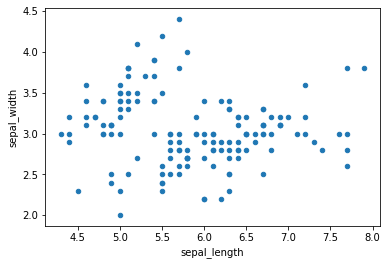

In [6]:
# 2-D scatter plot:
# Always understand the axis: labels and scale

iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

# cannot make much sense out of it.
# what if we color the points by their class-label/flower-type

/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


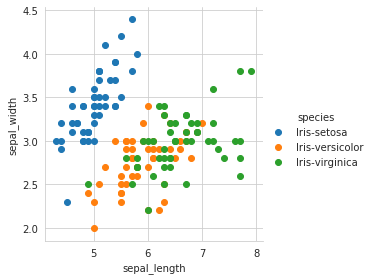

In [7]:
# 2-D Scatter plot with color-coding for each flower type/class
# Here 'sns' corresponds to seaborn
sns.set_style("whitegrid")
sns.FacetGrid(
    iris, 
    hue="species", 
    size=4).map(
        plt.scatter, "sepal_length", "sepal_width"
    ).add_legend()
plt.show()

# Notice that the blue data points can be easily separated from orange and green
# by drawing a line. But orange and green data points cannot be easily separated.
# Can we draw multiple 2-D scatter plot for each combination of features?  
# How many combination exists? 4C2 = 6

__Observation(s)__:

1. Using speal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Virginica is much harder as they have considerable overlap.

# Pair-plot

/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


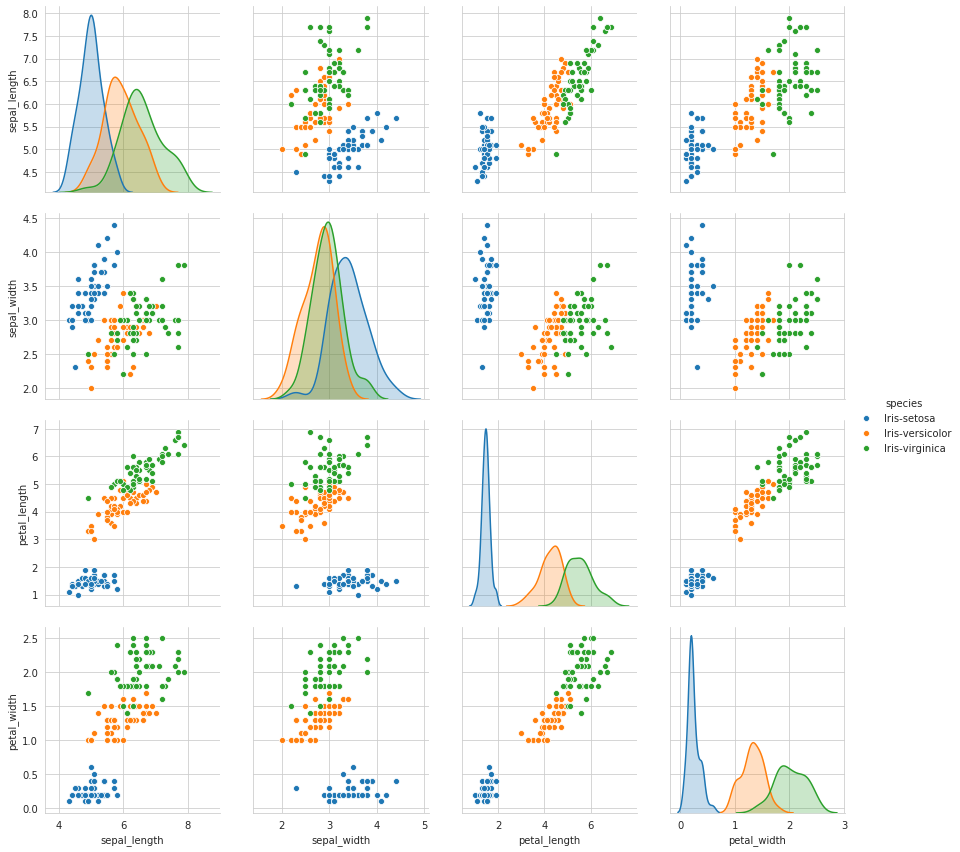

In [8]:
# pairwise scatter plot: Pair-Plot
# Disadvantage:
# Can be used when number of features are high
# cannot visualize higher dimensional patterns in 3-D and 4D
# only possible to view 2D patterns.

plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", size=3)
plt.show()
# Note: the diagonal elements are Probability Density Function
# for each features.

__Observations:__
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types

# Histogram, PDF, CDF

In [11]:
# What about 1D scatter plot using just one feature?
# 1D scatter plot of petal-length

iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]


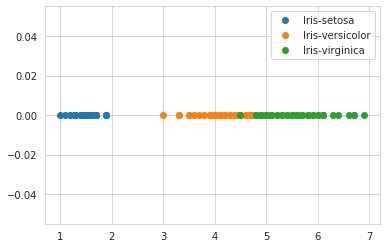

In [16]:
plt.plot(
    iris_setosa["petal_length"], 
    np.zeros_like(iris_setosa['petal_length']), 
    'o', 
    label="Iris-setosa")
plt.plot(
    iris_versicolor["petal_length"], 
    np.zeros_like(iris_versicolor['petal_length']), 
    'o', 
    label="Iris-versicolor")
plt.plot(
    iris_virginica["petal_length"], 
    np.zeros_like(iris_virginica['petal_length']), 
    'o', 
    label="Iris-virginica")
plt.legend()
plt.show()

# Disadvantages of 1D scatter plot: very hard to make sense as observations
# are overlapping a lot.
# Are there better ways of visualizing 1D scatter plots?

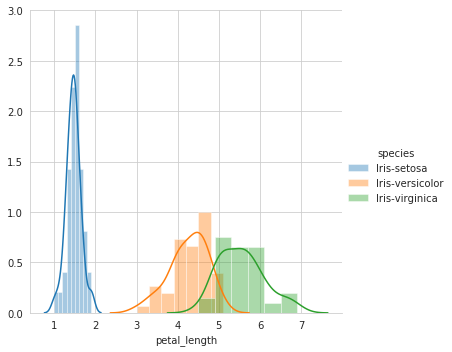

In [17]:
sns.FacetGrid(
    iris, 
    hue="species", 
    size=5
).map(
    sns.distplot, "petal_length"
).add_legend()
plt.show()

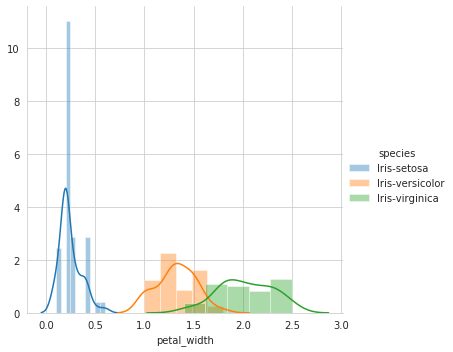

In [18]:
sns.FacetGrid(
    iris, 
    hue="species", 
    size=5
).map(
    sns.distplot, "petal_width"
).add_legend()
plt.show()

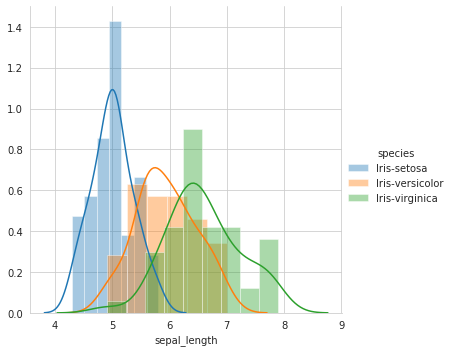

In [19]:
sns.FacetGrid(
    iris, 
    hue="species", 
    size=5
).map(
    sns.distplot, "sepal_length"
).add_legend()
plt.show()

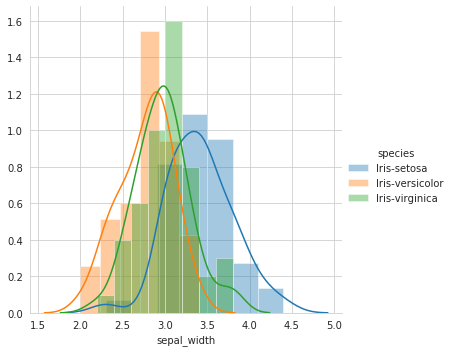

In [20]:
sns.FacetGrid(
    iris, 
    hue="species", 
    size=5
).map(
    sns.distplot, "sepal_width"
).add_legend()
plt.show()

In [21]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.

Probability Density Function: 
 [0.02040816 0.02040816 0.04081633 0.14285714 0.2244898  0.28571429
 0.14285714 0.08163265 0.         0.04081633]
Bin Edges:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


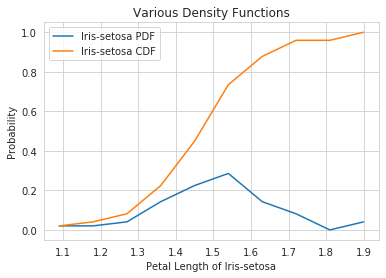

In [47]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of setosa flowers have a 
# petal_length of less than 1.9?
# How to construct a CDF?
# How to read a CDF?
#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("Probability Density Function: \n", pdf)
print("Bin Edges: ", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="Iris-setosa PDF")
plt.plot(bin_edges[1:], cdf, label="Iris-setosa CDF")

plt.xlabel("Petal Length of Iris-setosa")
plt.ylabel("Probability")
plt.title("Various Density Functions")
plt.legend()
plt.show()

__Observation__: From CDF curve

* There are 82% of setosa flower that have petal_length<=1.6
* 100% Setosa flower have petal_length<=1.9

[0.02040816 0.02040816 0.04081633 0.14285714 0.2244898  0.28571429
 0.14285714 0.08163265 0.         0.04081633]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


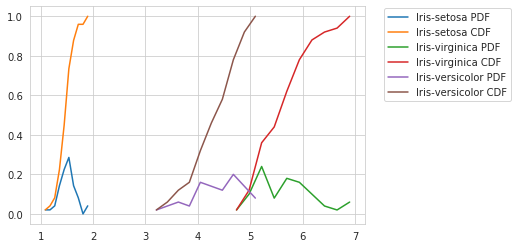

In [48]:
# Plots of CDF of petal_length for various types of flowers.
# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(
                                    iris_setosa['petal_length'], 
                                    bins=10, 
                                    density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Iris-setosa PDF")
plt.plot(bin_edges[1:], cdf, label="Iris-setosa CDF")


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Iris-virginica PDF")
plt.plot(bin_edges[1:], cdf, label="Iris-virginica CDF")


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,  label="Iris-versicolor PDF")
plt.plot(bin_edges[1:], cdf, label="Iris-versicolor CDF")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.show();

# Mean, Variance and Standard Deviation

In [67]:
print("Mean: ")
print("Mean of petal_length of Iris-setosa: {:.2f} ".format(np.mean(iris_setosa["petal_length"])))
print("Mean of petal_length of Iris-virginica: {:.2f}".format(np.mean(iris_virginica["petal_length"])))
print("Mean of petal_length of Iris-versicolor: {:.2f}".format(np.mean(iris_versicolor["petal_length"])))
print("\n****************************\n")
print("Standard Deviation(SD): ")
print("SD of petal_length of Iris-Setosa: {:.2f}".format(np.std(iris_setosa["petal_length"])))
print("SD of petal_length of Iris-virginica: {:.2f}".format(np.std(iris_virginica["petal_length"])))
print("SD of petal_length of Iris-versicolor: {:.2f}".format(np.std(iris_versicolor["petal_length"])))

Mean: 
Mean of petal_length of Iris-setosa: 1.47 
Mean of petal_length of Iris-virginica: 5.55
Mean of petal_length of Iris-versicolor: 4.26

****************************

Standard Deviation(SD): 
SD of petal_length of Iris-Setosa: 0.17
SD of petal_length of Iris-virginica: 0.55
SD of petal_length of Iris-versicolor: 0.47


In [70]:
iris_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,49.000000,49.000000,49.000000,49.000000
mean,5.004082,3.416327,1.465306,0.244898
std,0.355879,0.384787,0.175061,0.108130
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000
